In [16]:
import pandas as pd
import numpy as np
import yfinance as yf

veri = pd.DataFrame(yf.download("^SPX",period="5Y"))
veri = veri[["Close","Open","High","Low","Volume"]]
print(veri)

/tmp/ipython-input-16-3209139300.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  veri = pd.DataFrame(yf.download("^SPX",period="5Y"))
[*********************100%***********************]  1 of 1 completed

Price             Close         Open         High          Low      Volume
Ticker             ^SPX         ^SPX         ^SPX         ^SPX        ^SPX
Date                                                                      
2020-07-06  3179.719971  3155.290039  3182.590088  3155.290039  4759160000
2020-07-07  3145.320068  3166.439941  3184.149902  3142.929932  4571330000
2020-07-08  3169.939941  3153.070068  3171.800049  3136.530029  4937310000
2020-07-09  3152.050049  3176.169922  3179.780029  3115.699951  4843650000
2020-07-10  3185.040039  3152.469971  3186.820068  3136.219971  4524190000
...                 ...          ...          ...          ...         ...
2025-06-27  6173.069824  6150.700195  6187.680176  6132.350098  7889350000
2025-06-30  6204.950195  6193.359863  6215.080078  6174.970215  5782900000
2025-07-01  6198.009766  6187.250000  6210.779785  6177.970215  6275310000
2025-07-02  6227.419922  6193.879883  6227.600098  6188.290039  5645710000
2025-07-03  6279.350098  

In [17]:
from sklearn.preprocessing import RobustScaler
sc =  RobustScaler()
veri_sc = sc.fit_transform(veri)

train_size = int(len(veri_sc)*0.7)
train,test = veri_sc[0:train_size],veri_sc[train_size:]

def multits(data,time_step):
    x,y = [],[]
    for i in range(time_step,len(data)):
        x.append(data[i-time_step:i,0:data.shape[1]])
        y.append(data[i,0])
    return np.array(x),np.array(y)

x_train,y_train = multits(train,20)
x_test,y_test = multits(test,20)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0834 - val_loss: 0.5473
Epoch 2/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0132 - val_loss: 0.3800
Epoch 3/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0101 - val_loss: 0.3297
Epoch 4/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0097 - val_loss: 0.2799
Epoch 5/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0096 - val_loss: 0.2417
Epoch 6/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0091 - val_loss: 0.2181
Epoch 7/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0089 - val_loss: 0.1778
Epoch 8/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0077 - val_loss: 0.1769
Epoch 9/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0081 - val_loss: 0.1571
Epoch 10/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0082 - val_loss: 0.1403
Epoch 11/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0071 - val_loss: 0.1194
Epoch 12/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0080 - v

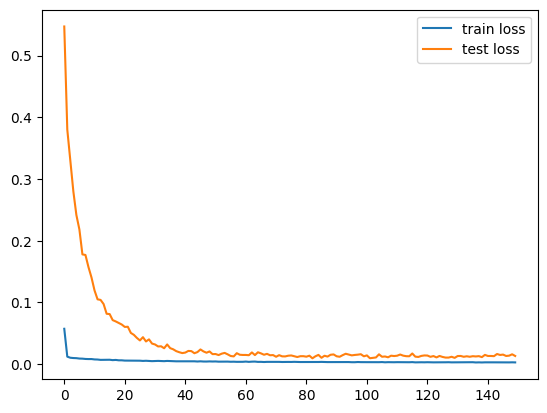

In [18]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt


model = Sequential()
model.add(LSTM(units=128,input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1]))
opt = Adam(learning_rate=0.0001)
model.compile(loss="mean_squared_error",optimizer=opt)
history = model.fit(x_train,y_train,epochs=150,validation_data=(x_test,y_test))

plt.plot(history.history["loss"],label="train loss")
plt.plot(history.history["val_loss"],label="test loss")
plt.legend()
plt.show()


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


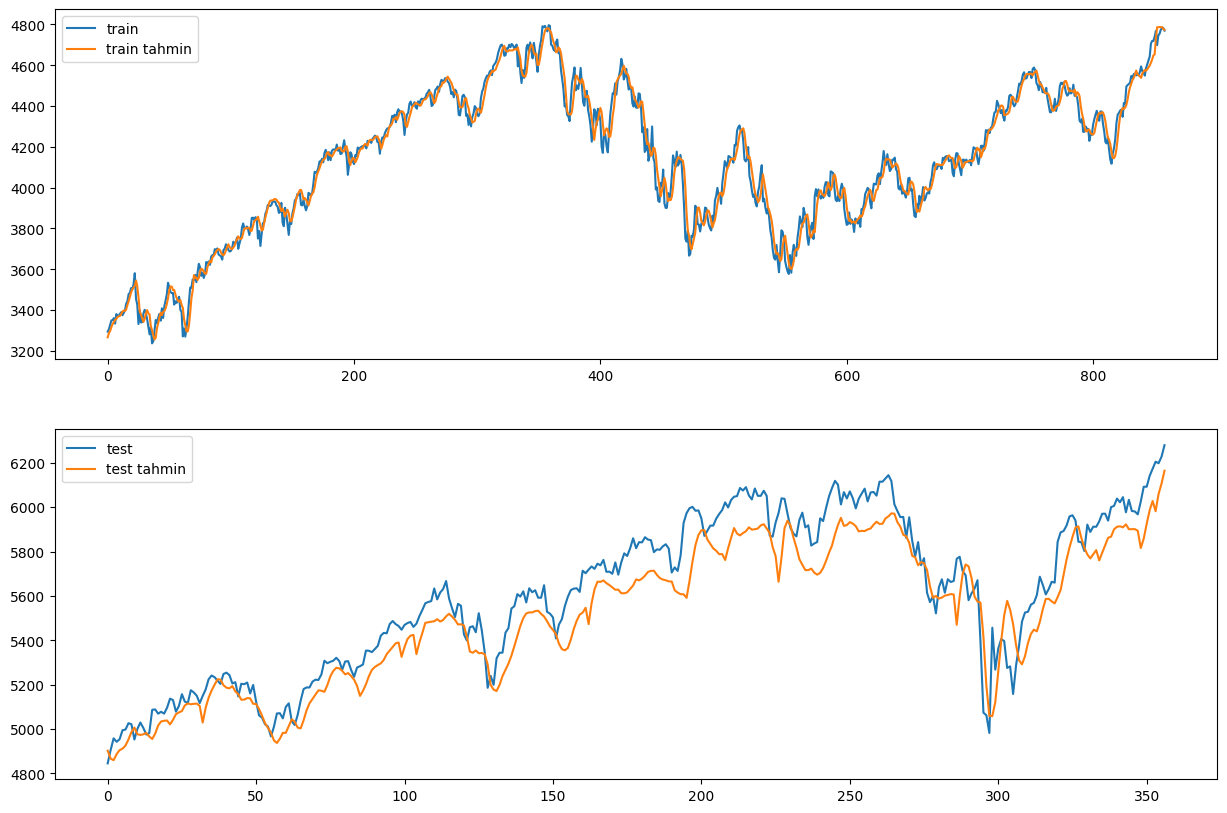

In [19]:
traintahmin = model.predict(x_train)
testtahmin = model.predict(x_test)

traintahmin_copy = np.repeat(traintahmin,x_train.shape[2],axis=-1)
testtahmin_copy = np.repeat(testtahmin,x_test.shape[2],axis=-1)
y_train_copy = np.repeat(y_train,x_train.shape[2],axis=-1)
y_test_copy = np.repeat(y_test,x_test.shape[2],axis=-1)

traintahmin = traintahmin_copy.reshape(len(traintahmin),x_train.shape[2])
testtahmin = testtahmin_copy.reshape(len(testtahmin),x_train.shape[2])
y_train = y_train_copy.reshape(len(y_train),x_train.shape[2])
y_test = y_test_copy.reshape(len(y_test),x_train.shape[2])


traintahmin = sc.inverse_transform(traintahmin)[:,0]
testtahmin = sc.inverse_transform(testtahmin)[:,0]
y_train = sc.inverse_transform(y_train)[:,0]
y_test = sc.inverse_transform(y_test)[:,0]

fig,axs = plt.subplots(2,1,figsize=(15,10))
axs[0].plot(y_train,label="train")
axs[0].plot(traintahmin,label="train tahmin")
axs[0].legend()
axs[1].plot(y_test,label="test")
axs[1].plot(testtahmin,label="test tahmin")
axs[1].legend()
plt.show()